In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

sns.set()
from sklearn.linear_model import LinearRegression

In [2]:
raw_data = pd.read_csv('data/1.04.+Real-life+example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [3]:
raw_data.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [5]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [6]:
raw_data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [7]:
data = raw_data.drop(['Model'], axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [8]:
data_no_mv = data.dropna(axis=0)
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

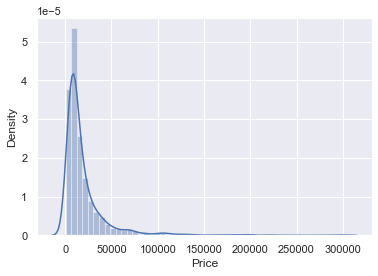

In [10]:
sns.distplot(data_no_mv['Price'])

In [12]:
#Cleaning Price
q = data_no_mv['Price'].quantile(0.95)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3823,3823.000000,3823,3823.000000,3823.000000,3823,3823,3823.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,872,NaN,1491,NaN,NaN,1740,3452,NaN
mean,NaN,14911.796798,NaN,171.095998,2.715250,NaN,NaN,2005.934868
std,NaN,12198.369515,NaN,99.269432,5.052605,NaN,NaN,6.565549
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6800.000000,NaN,100.000000,1.800000,NaN,NaN,2002.000000
50%,NaN,10900.000000,NaN,163.000000,2.000000,NaN,NaN,2007.000000
75%,NaN,19150.000000,NaN,234.000000,3.000000,NaN,NaN,2011.000000


In [14]:
#Cleaning Price part 2
q = data_1['Price'].quantile(0.05)
data_2 = data_1[data_1['Price']>q]
data_2.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3628,3628.000000,3628,3628.000000,3628.000000,3628,3628,3628.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,818,NaN,1396,NaN,NaN,1652,3371,NaN
mean,NaN,15605.524066,NaN,167.192393,2.723076,NaN,NaN,2006.548512
std,NaN,12138.876867,NaN,97.285452,4.917384,NaN,NaN,6.001021
min,NaN,2600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7400.000000,NaN,99.750000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,20000.000000,NaN,229.000000,3.000000,NaN,NaN,2011.000000


In [16]:
#Cleaning EngineV
data_3 = data_2[data_2['EngineV']<6.5]
data_3.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3607,3607.000000,3607,3607.000000,3607.000000,3607,3607,3607.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,814,NaN,1386,NaN,NaN,1645,3355,NaN
mean,NaN,15642.518800,NaN,167.077072,2.423809,NaN,NaN,2006.559190
std,NaN,12150.427914,NaN,97.370479,0.929537,NaN,NaN,6.004461
min,NaN,2600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7400.000000,NaN,99.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,160.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,20000.000000,NaN,228.000000,3.000000,NaN,NaN,2011.000000


In [18]:
#Cleaning Mileage
q = data_3['Mileage'].quantile(0.99)
data_4 = data_3[data_3['Mileage']<q]
data_4.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3570,3570.000000,3570,3570.000000,3570.000000,3570,3570,3570.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,802,NaN,1373,NaN,NaN,1620,3321,NaN
mean,NaN,15728.015493,NaN,163.568347,2.423496,NaN,NaN,2006.658263
std,NaN,12160.214333,NaN,91.035945,0.931025,NaN,NaN,5.917455
min,NaN,2600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7500.000000,NaN,98.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11525.000000,NaN,159.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,20300.000000,NaN,224.750000,3.000000,NaN,NaN,2011.000000


In [19]:
#Cleaning Year
q = data_4['Year'].quantile(0.05)
data_5 = data_4[data_4['Year']>q]
data_5.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3389,3389.000000,3389,3389.000000,3389.000000,3389,3389,3389.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,760,NaN,1247,NaN,NaN,1586,3141,NaN
mean,NaN,16311.605506,NaN,158.292417,2.431773,NaN,NaN,2007.470345
std,NaN,12178.832920,NaN,86.580819,0.944178,NaN,NaN,4.817884
min,NaN,2600.000000,NaN,0.000000,0.600000,NaN,NaN,1996.000000
25%,NaN,8000.000000,NaN,97.000000,1.800000,NaN,NaN,2004.000000
50%,NaN,12000.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,20900.000000,NaN,217.000000,3.000000,NaN,NaN,2011.000000


In [20]:
data_cleaned = data_5.reset_index(drop=True)
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3389,3389.000000,3389,3389.000000,3389.000000,3389,3389,3389.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,760,NaN,1247,NaN,NaN,1586,3141,NaN
mean,NaN,16311.605506,NaN,158.292417,2.431773,NaN,NaN,2007.470345
std,NaN,12178.832920,NaN,86.580819,0.944178,NaN,NaN,4.817884
min,NaN,2600.000000,NaN,0.000000,0.600000,NaN,NaN,1996.000000
25%,NaN,8000.000000,NaN,97.000000,1.800000,NaN,NaN,2004.000000
50%,NaN,12000.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,20900.000000,NaN,217.000000,3.000000,NaN,NaN,2011.000000


### Checking OLS Assumptions

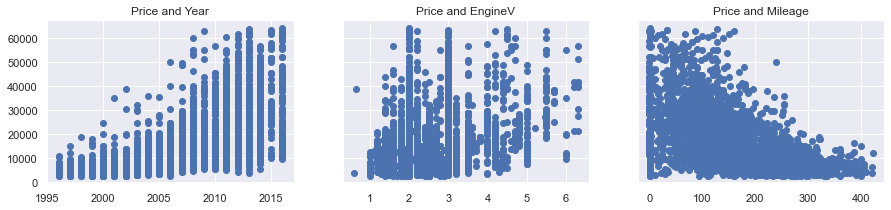

In [21]:
f, (ax1,ax2,ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title("Price and Year")
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title("Price and EngineV")
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title("Price and Mileage")

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

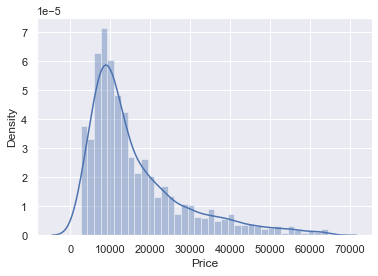

In [22]:
sns.distplot(data_cleaned['Price'])

### Relaxing the Assumptions

In [28]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['Log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Log price,Log_price
0,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519,9.495519
1,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249,10.043249
2,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656,9.814656
3,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,9.560997,9.560997
4,Renault,10799.0,vagon,193,1.5,Diesel,yes,2012,9.287209,9.287209
...,...,...,...,...,...,...,...,...,...,...
3384,Renault,6800.0,sedan,152,1.6,Petrol,yes,2007,8.824678,8.824678
3385,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102,9.350102
3386,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556,9.792556
3387,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557,8.779557


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Log_price', ylabel='Density'>

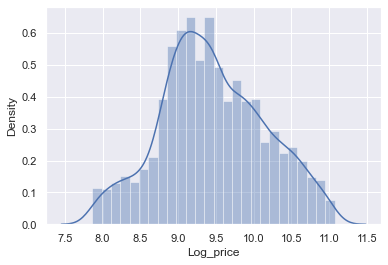

In [29]:
sns.distplot(data_cleaned['Log_price'])

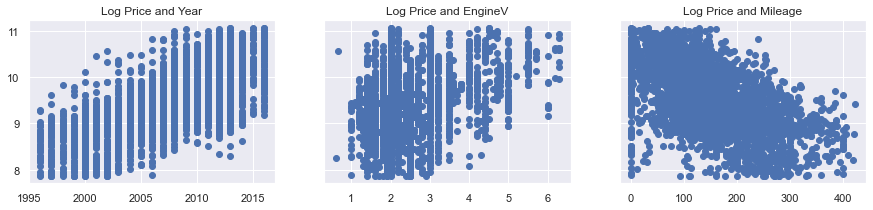

In [30]:
f, (ax1,ax2,ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Log_price'])
ax1.set_title("Log Price and Year")
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Log_price'])
ax2.set_title("Log Price and EngineV")
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Log_price'])
ax3.set_title("Log Price and Mileage")

plt.show()

In [31]:
data_cleaned = data_cleaned.drop(['Price'], axis=1)
data_cleaned.describe(include='all')

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Log price,Log_price
count,3389,3389,3389.000000,3389.000000,3389,3389,3389.000000,3389.000000,3389.000000
unique,7,6,NaN,NaN,4,2,NaN,NaN,NaN
top,Volkswagen,sedan,NaN,NaN,Diesel,yes,NaN,NaN,NaN
freq,760,1247,NaN,NaN,1586,3141,NaN,NaN,NaN
mean,NaN,NaN,158.292417,2.431773,NaN,NaN,2007.470345,9.457040,9.457040
std,NaN,NaN,86.580819,0.944178,NaN,NaN,4.817884,0.695691,0.695691
min,NaN,NaN,0.000000,0.600000,NaN,NaN,1996.000000,7.863267,7.863267
25%,NaN,NaN,97.000000,1.800000,NaN,NaN,2004.000000,8.987197,8.987197
50%,NaN,NaN,155.000000,2.200000,NaN,NaN,2008.000000,9.392662,9.392662
75%,NaN,NaN,217.000000,3.000000,NaN,NaN,2011.000000,9.947504,9.947504


### Multicollinearity

In [33]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Log price', 'Log_price'], dtype=object)

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i)for i in range(variables.shape[1])]
vif['Features'] = variables.columns

In [35]:
vif

,VIF,Features
0,4.365344,Mileage
1,10.040135,Year
2,7.706731,EngineV


In [40]:
data_cleaned = data_cleaned.drop(['Log price'], axis =1)

### Create dummy variable

In [41]:
data_with_dummies = pd.get_dummies(data_cleaned, drop_first=True)
data_with_dummies.head()

,Mileage,EngineV,Year,Log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,358,5.0,2003,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
1,240,4.2,2007,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,120,2.0,2011,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
3,200,2.7,2006,9.560997,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,193,1.5,2012,9.287209,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1


In [42]:
variables = data_with_dummies
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

In [43]:
vif

,VIF,Features
0,9.938758,Mileage
1,14.458221,EngineV
2,741.724947,Year
3,711.550745,Log_price
4,2.547898,Brand_BMW
5,3.112601,Brand_Mercedes-Benz
6,2.244810,Brand_Mitsubishi
7,2.937751,Brand_Renault
8,2.682209,Brand_Toyota
9,3.688502,Brand_Volkswagen


In [44]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'Year', 'Log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [47]:
cols = ['Log_price','Mileage', 'EngineV', 'Year', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [48]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed

,Log_price,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,9.495519,358,5.0,2003,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
1,10.043249,240,4.2,2007,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,9.814656,120,2.0,2011,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
3,9.560997,200,2.7,2006,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,9.287209,193,1.5,2012,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,8.824678,152,1.6,2007,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1
3385,9.350102,163,2.5,2008,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3386,9.792556,35,1.6,2014,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3387,8.779557,1,3.5,1999,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


### Linear Regression Model

### Declare Inputs and Targets

In [49]:
inputs = data_preprocessed.drop(['Log_price'], axis=1)
targets = data_preprocessed['Log_price']

### Feature Selections

In [51]:
from sklearn.feature_selection import f_regression
f_regression(inputs,targets)

(array([1.46822834e+03, 5.88370085e+02, 2.62074859e+03, 4.12593600e+01,
        2.72669459e+01, 2.08847496e+01, 2.32760703e+02, 8.46546228e+01,
        1.84368723e+01, 4.28456898e+01, 9.94304852e+00, 2.57984911e+01,
        9.22335506e+01, 1.28447057e+02, 6.94607550e+00, 2.49831174e+00,
        3.44313957e+01, 7.41506769e+02]),
 array([3.48650788e-267, 5.58802045e-120, 0.00000000e+000, 1.51915590e-010,
        1.87898491e-007, 5.05178618e-006, 7.05881021e-051, 6.05215652e-020,
        1.80552620e-005, 6.81738221e-011, 1.62870259e-003, 3.99459248e-007,
        1.44644286e-021, 2.99410341e-029, 8.43863087e-003, 1.14061787e-001,
        4.84050796e-009, 8.05089860e-148]))

In [52]:
p_values = f_regression(inputs,targets)[1]
p_values = p_values.round(3)
p_values

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.002, 0.   , 0.   , 0.   , 0.008, 0.114, 0.   , 0.   ])

In [53]:
reg_sum = pd.DataFrame(data=inputs.columns.values,columns=['Features'])
reg_sum['p-value'] = p_values
reg_sum

,Features,p-value
0,Mileage,0.000
1,EngineV,0.000
2,Year,0.000
3,Brand_BMW,0.000
4,Brand_Mercedes-Benz,0.000
5,Brand_Mitsubishi,0.000
6,Brand_Renault,0.000
7,Brand_Toyota,0.000
8,Brand_Volkswagen,0.000
9,Body_hatch,0.000


### Scaling the Data

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [56]:
inputs_scaled = scaler.transform(inputs)

### Train Test Split

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

### Create Regression

In [60]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [61]:
y_hat = reg.predict(x_train)

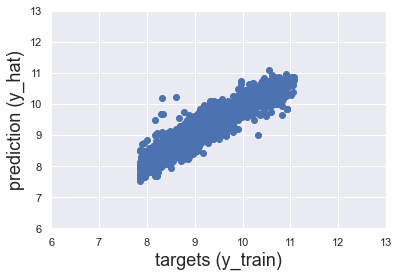

In [62]:
#First Check
plt.scatter(y_train,y_hat)
plt.xlabel("targets (y_train)", size=18)
plt.ylabel("prediction (y_hat)", size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Log_price', ylabel='Density'>

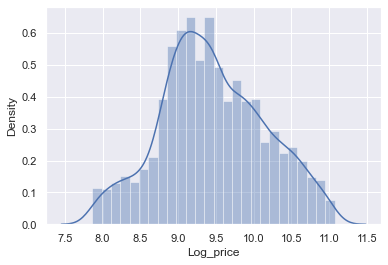

In [64]:
sns.distplot(data_preprocessed['Log_price'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

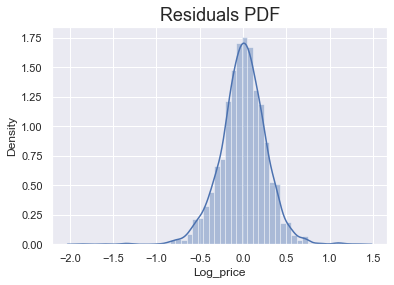

In [65]:
#Second check, residual plot
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

R2 score

In [66]:
reg.score(x_train,y_train)

0.8529830439106674

In [67]:
x_train.shape

(2711, 18)

adjusted r2

In [68]:
def adj_r2(x_train,y_train):
    r2 = reg.score(x_train,y_train)
    n = x_train.shape[0]
    p = x_train.shape[1]
    adjusted_r2 = 1 - (1 - r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [69]:
adj_r2(x_train,y_train)

0.8520000182013033

### Testing

In [70]:
y_hat_test = reg.predict(x_test)

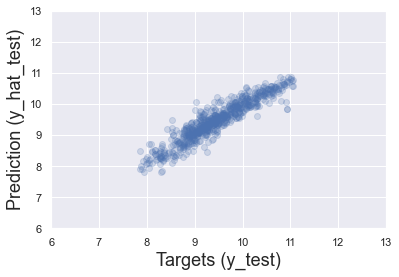

In [71]:
plt.scatter(y_test,y_hat_test, alpha=0.2)
plt.xlabel("Targets (y_test)", size=18)
plt.ylabel("Prediction (y_hat_test)", size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [72]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Predictions'])
df_pf.head()

,Predictions
0,29818.925426
1,8884.750026
2,9935.703000
3,8296.241291
4,9023.766085


In [73]:
df_pf['Targets'] = np.exp(y_test)
df_pf

,Predictions,Targets
0,29818.925426,NaN
1,8884.750026,NaN
2,9935.703000,NaN
3,8296.241291,NaN
4,9023.766085,NaN
...,...,...
673,8309.775761,NaN
674,19527.100496,16800.0
675,16033.402967,NaN
676,9837.268381,NaN


In [74]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0    10.558414
1     9.137770
2     9.350102
3     8.779557
4     9.350015
Name: Log_price, dtype: float64

In [75]:
df_pf['Targets'] = np.exp(y_test)
df_pf

,Predictions,Targets
0,29818.925426,38500.0
1,8884.750026,9300.0
2,9935.703000,11500.0
3,8296.241291,6500.0
4,9023.766085,11499.0
...,...,...
673,8309.775761,7400.0
674,19527.100496,20500.0
675,16033.402967,18700.0
676,9837.268381,7600.0


In [76]:
df_pf['Residual'] = df_pf['Targets'] - df_pf['Predictions']

In [77]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Targets']*100)
df_pf

,Predictions,Targets,Residual,Difference%
0,29818.925426,38500.0,8681.074574,22.548246
1,8884.750026,9300.0,415.249974,4.465053
2,9935.703000,11500.0,1564.297000,13.602583
3,8296.241291,6500.0,-1796.241291,27.634481
4,9023.766085,11499.0,2475.233915,21.525645
...,...,...,...,...
673,8309.775761,7400.0,-909.775761,12.294267
674,19527.100496,20500.0,972.899504,4.745851
675,16033.402967,18700.0,2666.597033,14.259877
676,9837.268381,7600.0,-2237.268381,29.437742


In [78]:
df_pf.describe()

,Predictions,Targets,Residual,Difference%
count,678.000000,678.000000,678.000000,678.000000
mean,15913.638845,16431.012286,517.373441,19.719835
std,10231.132258,12486.471360,5071.664239,20.185623
min,2429.600420,2600.000000,-14940.557841,0.112591
25%,8492.640835,7800.000000,-1650.121006,6.753021
50%,13037.726107,12095.000000,-49.155279,14.202671
75%,21126.554347,20975.000000,1760.008843,24.997234
max,52408.428187,63000.000000,37084.192424,177.863784


In [79]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by='Difference%')

,Predictions,Targets,Residual,Difference%
17,12785.59,12800.00,14.41,0.11
566,13182.51,13200.00,17.49,0.13
579,21908.62,21950.00,41.38,0.19
266,3293.76,3300.00,6.24,0.19
364,3887.74,3900.00,12.26,0.31
292,7216.22,7245.00,28.78,0.40
354,19719.15,19800.00,80.85,0.41
379,10946.74,10900.00,-46.74,0.43
552,13640.86,13700.00,59.14,0.43
154,8860.13,8899.00,38.87,0.44
